<a href="https://colab.research.google.com/github/shreyash2610/Machinehack-Mathcothon-Car-Price-Prediction/blob/main/MachineHack_Mathco_thon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Installing required libraries

!pip install catboost
!pip install category_encoders

     |████████████████████████████████| 69.2 MB 5.1 kB/s 
     |████████████████████████████████| 80 kB 5.1 MB/s 


In [2]:
#Ignoring warnings

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
#Importing necessary libraries

import numpy as np
import category_encoders as ce
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import catboost as cb
import lightgbm as lgbm
import xgboost as xgb

In [4]:
#Picking up useful modules for our code

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from category_encoders import CountEncoder,OrdinalEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [5]:
#Loading data and checking few samples

df=pd.read_csv("/content/drive/MyDrive/MachineHack/Mathco.thon: Car Prediction/train.csv")
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [6]:
#Checking out shape of our dataset and deleting ID column since it has no role to play

print("Training dataset shape: ",df.shape)
del df['ID']

Training dataset shape:  (19237, 18)


In [7]:
#Looking for nans in data but it shows no nans but thats wrong and following the good practice of checking few samples earlier we can see that some part of data is messed up
#Lets clean it then

df.isna().sum()

Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [8]:
print("Null values in Levy : ",sum(df['Levy']=="-"))

Null values in Levy :  5819


In [9]:
#Initially replacing '-' with zero since it doesn't contain any zero intially so lets keep a count of it as well which is 5819
df['Levy'][df['Levy']=='-']=0
df['Levy']=df['Levy'].astype(float)

(array([5.819e+03, 0.000e+00, 0.000e+00, 1.000e+01, 1.000e+00, 0.000e+00,
        7.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 6.000e+00, 7.700e+01,
        2.400e+01, 1.020e+02, 7.000e+01, 8.300e+01, 2.790e+02, 3.200e+01,
        7.500e+01, 8.500e+01, 1.860e+02, 2.580e+02, 4.410e+02, 4.700e+01,
        5.360e+02, 3.340e+02, 1.090e+02, 1.338e+03, 1.500e+01, 3.170e+02,
        2.830e+02, 3.220e+02, 9.820e+02, 9.370e+02, 6.500e+01, 6.190e+02,
        1.340e+02, 1.470e+02, 5.750e+02, 4.510e+02, 6.000e+00, 1.030e+02,
        8.100e+01, 5.390e+02, 2.110e+02, 3.620e+02, 3.700e+02, 9.900e+01,
        2.600e+01, 1.600e+01, 2.960e+02, 1.120e+02, 5.000e+01, 1.140e+02,
        2.720e+02, 8.800e+01, 1.470e+02, 6.100e+01, 1.160e+02, 2.170e+02,
        2.000e+01, 3.100e+01, 9.000e+00, 7.800e+01, 5.000e+01, 5.300e+01,
        5.000e+00, 2.800e+01, 4.900e+01, 5.400e+01, 8.900e+01, 2.900e+01,
        1.700e+01, 4.500e+01, 8.400e+01, 9.000e+00, 5.000e+00, 1.110e+02,
        7.100e+01, 2.200e+01, 9.000e+0

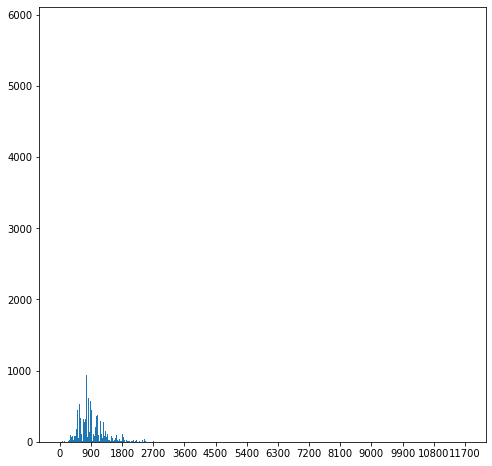

In [10]:
#Visualizing the graph
plt.figure(figsize=(8,8))
x_ticks = np.arange(0,12000,900)
plt.xticks(x_ticks)
plt.hist(df['Levy'],bins=500)

In [11]:
#From above graph, it can be seen that most of the data accumulate in between 0-1800 region and mean lies in between them only, 
#So lets replace 0 with the mean of the column

a=sum(df['Levy'])/(len(df['Levy'])-5819)
df['Levy'][df['Levy']==0]=a

In [12]:
#Since this is a categorical column, we need to encode categories

print("Total brands: ",len(df['Manufacturer'].unique()))
print()
print("Brands: ",df['Manufacturer'].unique())

Total brands:  65

Brands:  ['LEXUS' 'CHEVROLET' 'HONDA' 'FORD' 'HYUNDAI' 'TOYOTA' 'MERCEDES-BENZ'
 'OPEL' 'PORSCHE' 'BMW' 'JEEP' 'VOLKSWAGEN' 'AUDI' 'RENAULT' 'NISSAN'
 'SUBARU' 'DAEWOO' 'KIA' 'MITSUBISHI' 'SSANGYONG' 'MAZDA' 'GMC' 'FIAT'
 'INFINITI' 'ALFA ROMEO' 'SUZUKI' 'ACURA' 'LINCOLN' 'VAZ' 'GAZ' 'CITROEN'
 'LAND ROVER' 'MINI' 'DODGE' 'CHRYSLER' 'JAGUAR' 'ISUZU' 'SKODA'
 'DAIHATSU' 'BUICK' 'TESLA' 'CADILLAC' 'PEUGEOT' 'BENTLEY' 'VOLVO' 'სხვა'
 'HAVAL' 'HUMMER' 'SCION' 'UAZ' 'MERCURY' 'ZAZ' 'ROVER' 'SEAT' 'LANCIA'
 'MOSKVICH' 'MASERATI' 'FERRARI' 'SAAB' 'LAMBORGHINI' 'ROLLS-ROYCE'
 'PONTIAC' 'SATURN' 'ASTON MARTIN' 'GREATWALL']


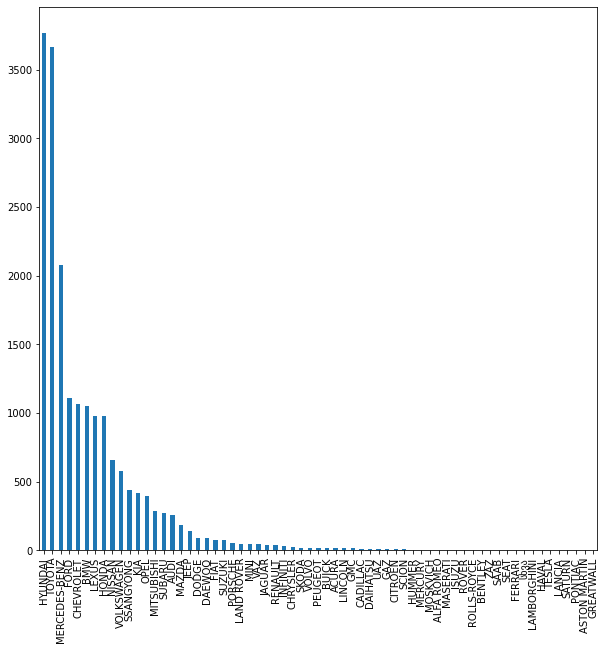

In [13]:
#Plotting column
plt.figure(figsize=(10,10))
df['Manufacturer'].value_counts().plot(kind='bar')

In [14]:
#Encoding with count encoder, cunt encoder replaces values with its group counting within that column and handling unkown value with any integer so it doesnt give any error

ce_manufacturer=ce.CountEncoder(handle_unknown=2)
df['Manufacturer']=ce_manufacturer.fit_transform(df['Manufacturer'],df['Price'])

In [15]:
#Number of models

print("Total models: ",len(df['Model'].unique()))
print()
print("Models: ",df['Model'].unique())

Total models:  1590

Models:  ['RX 450' 'Equinox' 'FIT' ... 'E 230 124' 'RX 450 F SPORT' 'Prius C aqua']


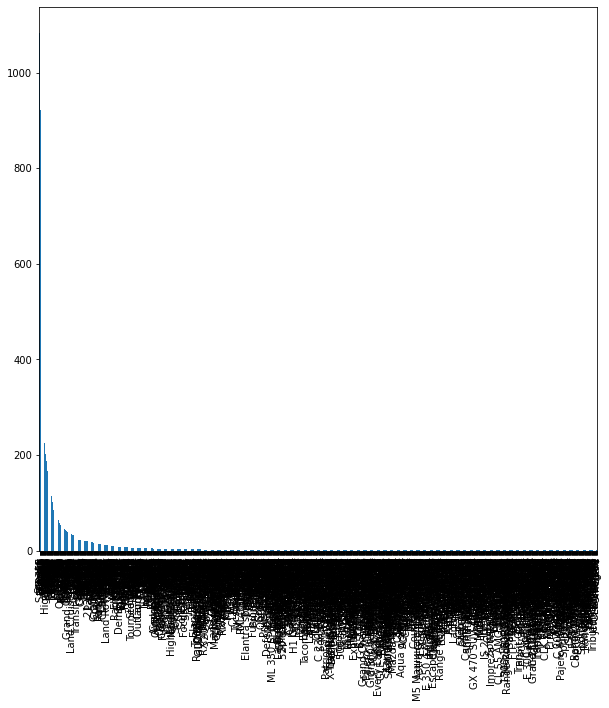

In [16]:
#Plooting it

plt.figure(figsize=(10,10))
df['Model'].value_counts().plot(kind='bar')

In [17]:
#Handling categories as count encoder with unknown to be handled with an integer

ce_model=CountEncoder(handle_unknown=2)
df['Model']=ce_model.fit_transform(df['Model'],df['Price'])

In [18]:
#Different years in which the car has been bought

df['Prod. year'].unique()

array([2010, 2011, 2006, 2014, 2016, 2013, 2007, 1999, 1997, 2018, 2008,
       2012, 2017, 2001, 1995, 2009, 2000, 2019, 2015, 2004, 1998, 1990,
       2005, 2003, 1985, 1996, 2002, 1993, 1992, 1988, 1977, 1989, 1994,
       2020, 1984, 1986, 1991, 1983, 1953, 1964, 1974, 1987, 1943, 1978,
       1965, 1976, 1957, 1980, 1939, 1968, 1947, 1982, 1981, 1973])

(array([ 3.,  0.,  0., ...,  0.,  0., 47.]),
 array([1939.    , 1939.0405, 1939.081 , ..., 2019.919 , 2019.9595,
        2020.    ]),
 <a list of 2000 Patch objects>)

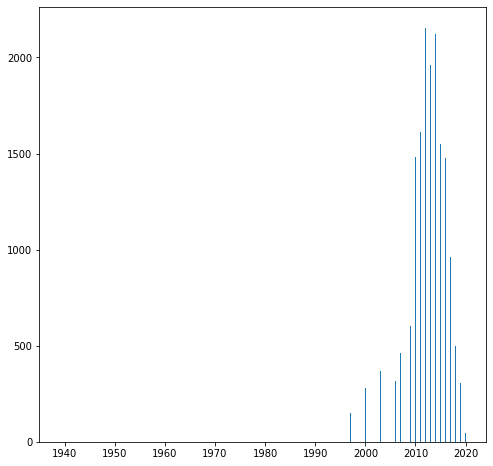

In [19]:
#Visualization

plt.figure(figsize=(8,8))
x_ticks = np.arange(1900,2050,10)
plt.xticks(x_ticks)
plt.hist(df['Prod. year'],bins=2000)

In [20]:
#Various types of cars being sold

print("Total categories: ",len(df['Category'].unique()))
print()
print("Categories: ",df['Category'].unique())

Total categories:  11

Categories:  ['Jeep' 'Hatchback' 'Sedan' 'Microbus' 'Goods wagon' 'Universal' 'Coupe'
 'Minivan' 'Cabriolet' 'Limousine' 'Pickup']


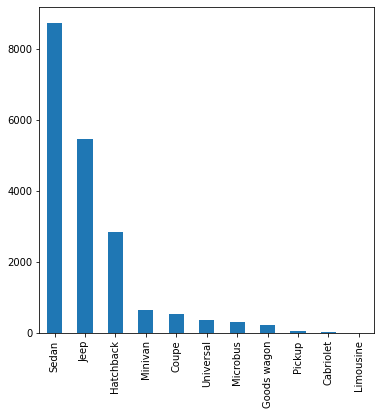

In [21]:
plt.figure(figsize=(6,6))
df['Category'].value_counts().plot(kind='bar')

In [22]:
#Encoding

ce_category=ce.CountEncoder(handle_unknown=2)
df['Category']=ce_category.fit_transform(df['Category'],df['Price'])

In [23]:
#Whether car has interior of leather or not

print(len(df['Leather interior'].unique()))
print()
print(df['Leather interior'].unique())

2

['Yes' 'No']


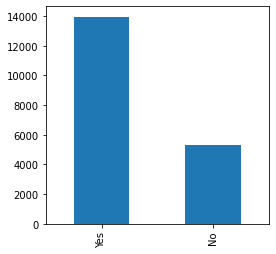

In [24]:
#Most of the people has leather interior 

plt.figure(figsize=(4,4))
df['Leather interior'].value_counts().plot(kind='bar')

In [25]:
#Binary encoding

df['Leather interior'][df['Leather interior']=="Yes"]=1
df['Leather interior'][df['Leather interior']=="No"]=0

In [26]:
#Usage of different types of fuels in cars

print("Fuel types: ",len(df['Fuel type'].unique()))
print()
print("Types: ",df['Fuel type'].unique())

Fuel types:  7

Types:  ['Hybrid' 'Petrol' 'Diesel' 'CNG' 'Plug-in Hybrid' 'LPG' 'Hydrogen']


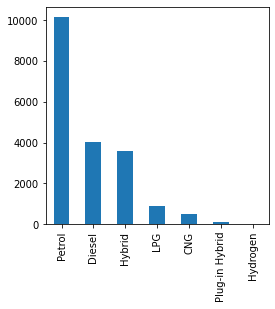

In [27]:
#Most people prefer to use petrol as fuel

plt.figure(figsize=(4,4))
df['Fuel type'].value_counts().plot(kind='bar')

In [28]:
#Using one hot encoding

f_t=pd.get_dummies(df['Fuel type'],prefix='f_t')
df=df.join(f_t)
del df['Fuel type']

In [29]:
#Quite messed up column, so lets create a new column for 'Turbo' feature as some cars have 'Turbo' feature while others dont.

print("Type of Engine volume: ",len(df['Engine volume'].unique()))
print()
print("Volume: ",df['Engine volume'].unique())

Type of Engine volume:  107

Volume:  ['3.5' '3' '1.3' '2.5' '2' '1.8' '2.4' '4' '1.6' '3.3' '2.0 Turbo'
 '2.2 Turbo' '4.7' '1.5' '4.4' '3.0 Turbo' '1.4 Turbo' '3.6' '2.3'
 '1.5 Turbo' '1.6 Turbo' '2.2' '2.3 Turbo' '1.4' '5.5' '2.8 Turbo' '3.2'
 '3.8' '4.6' '1.2' '5' '1.7' '2.9' '0.5' '1.8 Turbo' '2.4 Turbo'
 '3.5 Turbo' '1.9' '2.7' '4.8' '5.3' '0.4' '2.8' '3.2 Turbo' '1.1' '2.1'
 '0.7' '5.4' '1.3 Turbo' '3.7' '1' '2.5 Turbo' '2.6' '1.9 Turbo'
 '4.4 Turbo' '4.7 Turbo' '0.8' '0.2 Turbo' '5.7' '4.8 Turbo' '4.6 Turbo'
 '6.7' '6.2' '1.2 Turbo' '3.4' '1.7 Turbo' '6.3 Turbo' '2.7 Turbo' '4.3'
 '4.2' '2.9 Turbo' '0' '4.0 Turbo' '20' '3.6 Turbo' '0.3' '3.7 Turbo'
 '5.9' '5.5 Turbo' '0.2' '2.1 Turbo' '5.6' '6' '0.7 Turbo' '0.6 Turbo'
 '6.8' '4.5' '0.6' '7.3' '0.1' '1.0 Turbo' '6.3' '4.5 Turbo' '0.8 Turbo'
 '4.2 Turbo' '3.1' '5.0 Turbo' '6.4' '3.9' '5.7 Turbo' '0.9' '0.4 Turbo'
 '5.4 Turbo' '0.3 Turbo' '5.2' '5.8' '1.1 Turbo']


In [30]:
df['Engine volume_turbo']=1
df['Engine volume_turbo'][df['Engine volume'].str[-5:]=="Turbo"]=0

In [31]:
#Engine volume can never be 0, so lets replace zero with minimu of the column

df['Engine volume']=df['Engine volume'].str[:3].astype(float)
c=np.min(df['Engine volume'])
df['Engine volume'][df['Engine volume']==0]=np.min(df['Engine volume'])

(array([10.,  0.,  0., ...,  0.,  0.,  2.]),
 array([0.000e+00, 1.000e-02, 2.000e-02, ..., 1.998e+01, 1.999e+01,
        2.000e+01]),
 <a list of 2000 Patch objects>)

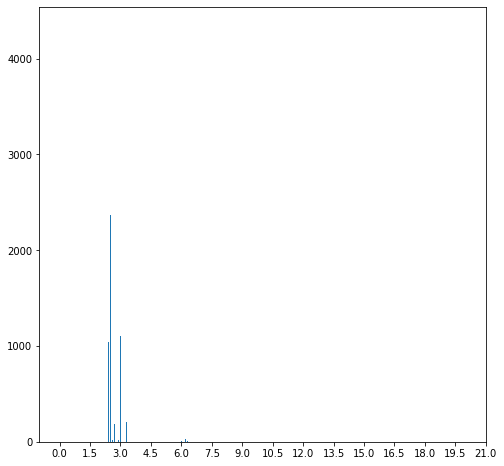

In [32]:
plt.figure(figsize=(8,8))
x_ticks = np.arange(0,25,1.5)
plt.xticks(x_ticks)
plt.hist(df['Engine volume'],bins=2000)

In [33]:
#Removing 'km' to convert string into float column

df['Mileage']=df['Mileage'].str[:-2].astype(float)

In [34]:
#Used cars can't have 0 mileage so lets replace it with mean

print("Number of null values: ",sum(df['Mileage']==0))

Number of null values:  721


In [35]:
b=sum(df['Mileage'])/(len(df)-721)
df['Mileage'][df['Mileage']==0]=b

(array([3.8000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 4.2000e+01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0700e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

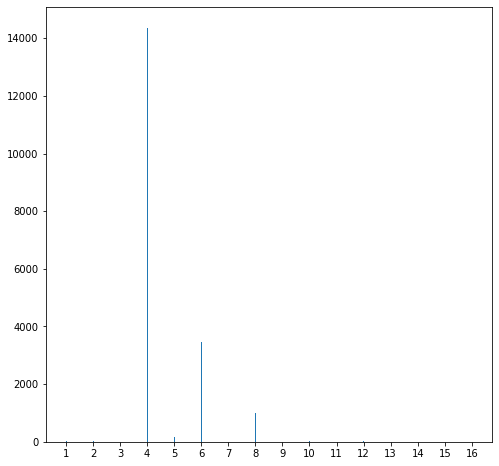

In [36]:
#Cylinders in cars

plt.figure(figsize=(8,8))
x_ticks = np.arange(0,20,1)
plt.xticks(x_ticks)
plt.hist(df['Cylinders'],bins=500)

In [37]:
#Four categories of gear boxes
print("Type of Gear box: ",len(df['Gear box type'].unique()))
print()
print("Gear box type: ",df['Gear box type'].unique())

Type of Gear box:  4

Gear box type:  ['Automatic' 'Tiptronic' 'Variator' 'Manual']


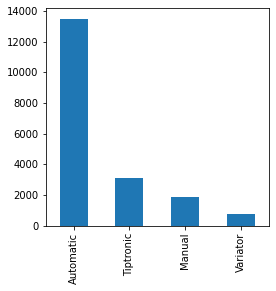

In [38]:
plt.figure(figsize=(4,4))
df['Gear box type'].value_counts().plot(kind='bar')

In [39]:
#Better to do one hot encoding rather than label encoding

ce_gbt=ce.CountEncoder()
df['Gear box type']=ce_gbt.fit_transform(df['Gear box type'],df['Price'])

In [40]:
#Types of drive wheels

print("Total Drive wheels: ",len(df['Drive wheels'].unique()))
print()
print("Drive wheels type: ",df['Drive wheels'].unique())

Total Drive wheels:  3

Drive wheels type:  ['4x4' 'Front' 'Rear']


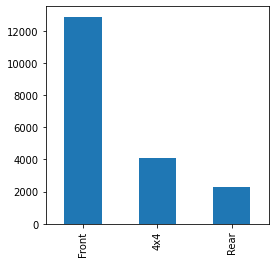

In [41]:
plt.figure(figsize=(4,4))
df['Drive wheels'].value_counts().plot(kind='bar')

In [42]:
#One-hot encoding

d_w=pd.get_dummies(df['Drive wheels'],prefix='d_w')
df=df.join(d_w)
del df['Drive wheels']

In [43]:
#Door type

print("Total Doors type: ",len(df['Doors'].unique()))
print()
print("Doors type: ",df['Doors'].unique())

Total Doors type:  3

Doors type:  ['04-May' '02-Mar' '>5']


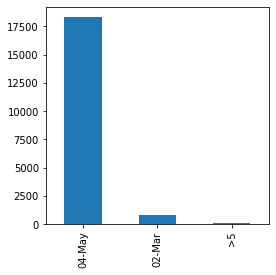

In [44]:
plt.figure(figsize=(4,4))
df['Doors'].value_counts().plot(kind='bar')

In [45]:
#Doing one hot encoding 

d_=pd.get_dummies(df['Doors'],prefix='d_')
df=df.join(d_)
del df['Doors']

In [46]:
#Whether wheel drive type is right handed or left handed

print("Total wheel drive types: ",len(df['Wheel'].unique()))
print()
print("Wheel type: ",df['Wheel'].unique())

Total wheel drive types:  2

Wheel type:  ['Left wheel' 'Right-hand drive']


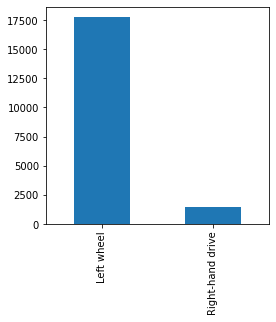

In [47]:
#Seems like left-handed driving is predominant in this dataset

plt.figure(figsize=(4,4))
df['Wheel'].value_counts().plot(kind='bar')

In [48]:
#Binarizing

df['Wheel'][df['Wheel']=="Left wheel"]=1
df['Wheel'][df['Wheel']=="Right-hand drive"]=0

In [49]:
#Various types of colors in which cars are made available

print("Total Colors: ",len(df['Color'].unique()))
print()
print("Colors: ",df['Color'].unique())

Total Colors:  16

Colors:  ['Silver' 'Black' 'White' 'Grey' 'Blue' 'Green' 'Red' 'Sky blue' 'Orange'
 'Yellow' 'Brown' 'Golden' 'Beige' 'Carnelian red' 'Purple' 'Pink']


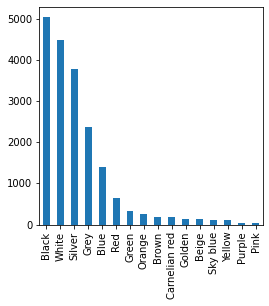

In [50]:
plt.figure(figsize=(4,4))
df['Color'].value_counts().plot(kind='bar')

In [51]:
#Looks like black and white is favourite  for everyone ;)
#Count encoding it
ce_color=CountEncoder()
df['Color']=ce_color.fit_transform(df['Color'])

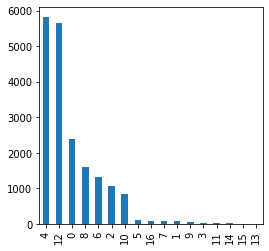

In [52]:
#So most cars have 4 or 12 airbags in it as per plot

plt.figure(figsize=(4,4))
df['Airbags'].value_counts().plot(kind='bar')

In [53]:
#Shuffling the data and assuring that every column is having float value

df=df.sample(frac=1,random_state=42)
df=df.astype(float)

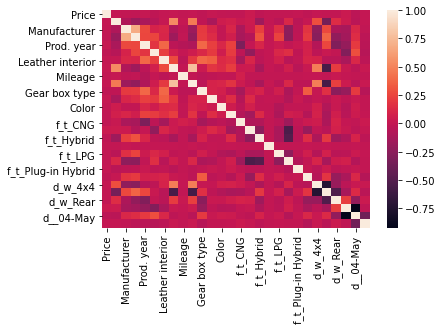

In [54]:
#Determining the correlation between various features of dataset

dataplot=sns.heatmap(df.corr())
plt.show()

In [55]:
#Now we can remove the taeget feature from dataset and store it in a different variable

y=df['Price']
del df['Price']

In [56]:
df.describe()

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Engine volume,Mileage,Cylinders,Gear box type,Wheel,Color,Airbags,f_t_CNG,f_t_Diesel,f_t_Hybrid,f_t_Hydrogen,f_t_LPG,f_t_Petrol,f_t_Plug-in Hybrid,Engine volume_turbo,d_w_4x4,d_w_Front,d_w_Rear,d__02-Mar,d__04-May,d__>5
count,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,1.923700e+04,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000
mean,906.838128,2024.461351,339.484899,2010.912824,5996.933462,0.725373,2.307990,1.591900e+06,4.582991,10205.475958,0.922857,3543.236315,6.582627,0.025680,0.209804,0.185996,0.000052,0.046369,0.527629,0.004471,0.899621,0.210948,0.669231,0.119821,0.040391,0.952955,0.006654
std,385.733455,1426.773918,377.940731,5.668673,2905.697874,0.446338,0.877805,4.840292e+07,1.199933,5105.082513,0.266825,1569.968175,4.320168,0.158182,0.407179,0.389113,0.007210,0.210288,0.499249,0.066714,0.300513,0.407992,0.470502,0.324761,0.196879,0.211740,0.081301
min,87.000000,1.000000,1.000000,1939.000000,11.000000,0.000000,0.000000,1.300000e+01,1.000000,746.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,730.000000,977.000000,35.000000,2009.000000,2847.000000,0.000000,1.800000,7.908000e+04,4.000000,3102.000000,1.000000,2375.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,906.838128,1111.000000,173.000000,2012.000000,5473.000000,1.000000,2.000000,1.340000e+05,4.000000,13514.000000,1.000000,3792.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,917.000000,3662.000000,533.000000,2015.000000,8736.000000,1.000000,2.500000,2.000000e+05,4.000000,13514.000000,1.000000,5033.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,11714.000000,3769.000000,1083.000000,2020.000000,8736.000000,1.000000,20.000000,2.147484e+09,16.000000,13514.000000,1.000000,5033.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
#Newly formed dataset seemed to have more number of columns than the original dataset

print("New shape of dataset: ",df.shape)

New shape of dataset:  (19237, 27)


In [58]:
#Scaling the dataset with respect to z score, i.e., mean and standard deviation

scaler=StandardScaler()
df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df.head()

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Engine volume,Mileage,Cylinders,Gear box type,Wheel,Color,Airbags,f_t_CNG,f_t_Diesel,f_t_Hybrid,f_t_Hydrogen,f_t_LPG,f_t_Petrol,f_t_Plug-in Hybrid,Engine volume_turbo,d_w_4x4,d_w_Front,d_w_Rear,d__02-Mar,d__04-May,d__>5
0,-1.679541,-0.669683,-0.517250,0.544617,-1.084082,-1.625208,-1.034414,-0.031546,-0.485866,0.648101,0.289122,0.158456,0.791048,-0.162347,-0.515276,-0.478011,-0.00721,-0.220508,-1.056873,14.922669,0.334036,-0.517052,0.703031,-0.368962,-0.205161,0.222187,-0.081844
1,0.000000,0.036123,-0.707761,-2.454399,-1.958594,0.615306,0.674439,-0.032820,1.180937,-1.631843,0.289122,-1.849918,-1.060780,-0.162347,1.940709,-0.478011,-0.00721,-0.220508,-1.056873,-0.067012,-2.993693,-0.517052,-1.422413,2.710308,4.874222,-4.500706,-0.081844
2,0.000000,0.036123,-0.744805,-2.630812,0.942678,-1.625208,-0.578720,-0.028499,2.847740,-1.631843,0.289122,-2.051838,-1.060780,-0.162347,-0.515276,-0.478011,-0.00721,-0.220508,0.946188,-0.067012,0.334036,-0.517052,-1.422413,2.710308,-0.205161,0.222187,-0.081844
3,-0.694379,1.222747,0.512038,0.544617,-0.180317,0.615306,-0.350873,-0.030147,-0.485866,0.648101,0.289122,-0.744134,-0.597823,-0.162347,1.940709,-0.478011,-0.00721,-0.220508,-1.056873,-0.067012,0.334036,-0.517052,0.703031,-0.368962,-0.205161,0.222187,-0.081844
4,-0.196613,-1.109848,-0.400827,1.073855,-0.180317,0.615306,-0.806567,-0.031841,-0.485866,0.648101,0.289122,0.602425,-0.597823,-0.162347,-0.515276,-0.478011,-0.00721,-0.220508,0.946188,-0.067012,0.334036,-0.517052,0.703031,-0.368962,-0.205161,0.222187,-0.081844


In [59]:
#Doing trial on training dataset using train test split method of sklearn with test size as 15% of the dataset

X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.15,random_state=42)

In [75]:
#Algorithms used are boosting tree algos since the next node the tree learns sufficiently from its previous nodes to perform further operations and produce dynamic results
#Algos used are catboost, random forest, light gbm, xg boost, gradient boost, extra tree regressors

cbr=cb.CatBoostRegressor(iterations=5000,loss_function='MAE',depth=12)
rfr=RandomForestRegressor(n_estimators=4000)
lgbmr=lgbm.LGBMRegressor(max_depth=12,n_estimators=1500,bagging_fraction=0.8)
xgbr=xgb.XGBRegressor(max_depth=8,n_estimators=4000)
gbr=GradientBoostingRegressor(n_estimators=4000,max_depth=12)
etr=ExtraTreesRegressor(n_estimators=4000)
gbr=GradientBoostingRegressor(n_estimators=4000,max_depth=12)

In [62]:
#Training various models
cbr.fit(X_train,np.log(y_train))

Streaming output truncated to the last 5000 lines.
0:	learn: 1.0885734	total: 66.7ms	remaining: 5m 33s
1:	learn: 1.0691147	total: 176ms	remaining: 7m 20s
2:	learn: 1.0506925	total: 250ms	remaining: 6m 57s
3:	learn: 1.0322934	total: 336ms	remaining: 6m 59s
4:	learn: 1.0145548	total: 412ms	remaining: 6m 51s
5:	learn: 0.9981419	total: 486ms	remaining: 6m 44s
6:	learn: 0.9834869	total: 565ms	remaining: 6m 42s
7:	learn: 0.9683418	total: 639ms	remaining: 6m 38s
8:	learn: 0.9538585	total: 712ms	remaining: 6m 34s
9:	learn: 0.9394681	total: 788ms	remaining: 6m 32s
10:	learn: 0.9269985	total: 869ms	remaining: 6m 34s
11:	learn: 0.9144058	total: 945ms	remaining: 6m 32s
12:	learn: 0.9017119	total: 1.03s	remaining: 6m 34s
13:	learn: 0.8899819	total: 1.1s	remaining: 6m 31s
14:	learn: 0.8782771	total: 1.18s	remaining: 6m 32s
15:	learn: 0.8676341	total: 1.26s	remaining: 6m 31s
16:	learn: 0.8572699	total: 1.33s	remaining: 6m 31s
17:	learn: 0.8464371	total: 1.41s	remaining: 6m 30s
18:	learn: 0.8370136	to

In [63]:
rfr.fit(X_train,np.log(y_train))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=4000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [64]:
y_pred1=np.exp(cbr.predict(X_test))
y_pred2=np.exp(rfr.predict(X_test))
y_p=pd.DataFrame(y_pred1,y_pred2)

In [65]:
y_p.to_csv('y_p_train.csv')
from google.colab import files
files.download('y_p_train.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [76]:
y_p=pd.read_csv("/content/drive/MyDrive/MachineHack/Mathco.thon: Car Prediction/y_p_train.csv")
y_p.head()

,Unnamed: 0,0
0,4271.035805,3761.682422
1,25801.301397,7903.348095
2,286.774004,282.446116
3,19905.564423,20385.537695
4,12750.168773,14702.872188


In [77]:
y_p['1']=y_p['0']
y_p['0']=y_p['Unnamed: 0']
del y_p['Unnamed: 0']

In [78]:
lgbmr.fit(X_train,np.log(y_train))
y_pred3=np.exp(lgbmr.predict(X_test))
y_p['2']=y_pred3

In [79]:
xgbr.fit(X_train,np.log(y_train))
y_pred4=np.exp(xgbr.predict(X_test))
y_p['3']=y_pred4

[20:27:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [80]:
etr.fit(X_train,np.log(y_train))
y_pred5=np.exp(etr.predict(X_test))
y_p['4']=y_pred5

In [81]:
gbr.fit(X_train,np.log(y_train))
y_pred6=np.exp(etr.predict(X_test))
y_p['5']=y_pred6

In [82]:
y_p['median']=y_p.median(axis=1)

In [83]:
y_p.head()

,0,1,2,3,4,5,median
0,4271.035805,3761.682422,4029.724883,3760.156494,3763.000000,3763.000000,3763.000000
1,25801.301397,7903.348095,12008.573751,15821.054688,8140.809737,8140.809737,10074.691744
2,286.774004,282.446116,334.632539,282.323761,282.000000,282.000000,282.384939
3,19905.564423,20385.537695,19949.154794,20376.222656,20385.000000,20385.000000,20380.611328
4,12750.168773,14702.872188,13970.348951,15501.989258,15831.051064,15831.051064,15102.430723


In [84]:
y_p['mean']=(y_p['0']+y_p['1']+y_p['2']+y_p['3']+y_p['4']+y_p['5'])/6 
y_p.head()

,0,1,2,3,4,5,median,mean
0,4271.035805,3761.682422,4029.724883,3760.156494,3763.000000,3763.000000,3763.000000,3891.433267
1,25801.301397,7903.348095,12008.573751,15821.054688,8140.809737,8140.809737,10074.691744,12969.316234
2,286.774004,282.446116,334.632539,282.323761,282.000000,282.000000,282.384939,291.696070
3,19905.564423,20385.537695,19949.154794,20376.222656,20385.000000,20385.000000,20380.611328,20231.079928
4,12750.168773,14702.872188,13970.348951,15501.989258,15831.051064,15831.051064,15102.430723,14764.580216


In [93]:
#Various metrics

print("RMSLE score: ",np.sqrt(sklearn.metrics.mean_squared_log_error(y_test,y_p['mean'])))
print("R2 score: ",sklearn.metrics.r2_score(y_test,y_p['mean']))
print("Root mean squared error: ",np.sqrt(sklearn.metrics.mean_squared_error(y_test,y_p['mean'])))
print("Mean squared log error: ",sklearn.metrics.mean_squared_log_error(y_test,y_p['mean']))
print("Mean absolute error: ",sklearn.metrics.mean_absolute_error(y_test,y_p['mean']))

RMSLE score:  0.8783645902720657
R2 score:  0.4376764052830413
Root mean squared error:  18021.652928418778
Mean squared log error:  0.7715243534438139
Mean absolute error:  4430.716149380652


In [60]:
#Doing same thing for test set

dff=pd.read_csv("/content/drive/MyDrive/MachineHack/Mathco.thon: Car Prediction/test.csv")
dff.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN


In [61]:
print("Test dataset shape: ",dff.shape)

Test dataset shape:  (8245, 18)


In [62]:
del dff['ID']

In [63]:
print("Null values in Levy : ",sum(dff['Levy']=="-"))

Null values in Levy :  2454


In [64]:
dff['Levy'][dff['Levy']=='-']=0
dff['Levy']=dff['Levy'].astype(float)

(array([2.454e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 4.000e+00, 3.100e+01,
        0.000e+00, 1.200e+01, 4.200e+01, 1.000e+00, 2.200e+01, 2.000e+01,
        1.300e+01, 3.900e+01, 7.000e+01, 9.000e+00, 1.300e+01, 3.200e+01,
        2.000e+01, 7.500e+01, 2.200e+01, 9.600e+01, 2.000e+01, 1.600e+02,
        6.000e+00, 2.000e+01, 3.310e+02, 1.500e+01, 5.900e+01, 3.100e+01,
        5.390e+02, 3.800e+01, 4.000e+00, 8.600e+01, 1.750e+02, 0.000e+00,
        8.200e+01, 1.110e+02, 3.540e+02, 3.260e+02, 5.200e+01, 3.000e+01,
        1.000e+00, 2.710e+02, 0.000e+00, 7.200e+01, 3.000e+01, 2.620e+02,
        8.400e+01, 7.200e+01, 4.300e+01, 3.000e+00, 3.500e+01, 2.700e+01,
        2.000e+00, 1.990e+02, 5.300e+01, 9.100e+01, 1.160e+02, 1.000e+02,
        9.300e+01, 5.000e+01, 0.000e+00, 1.600e+01, 6.000e+00, 8.500e+01,
        2.100e+01, 3.800e+01, 1.800e+0

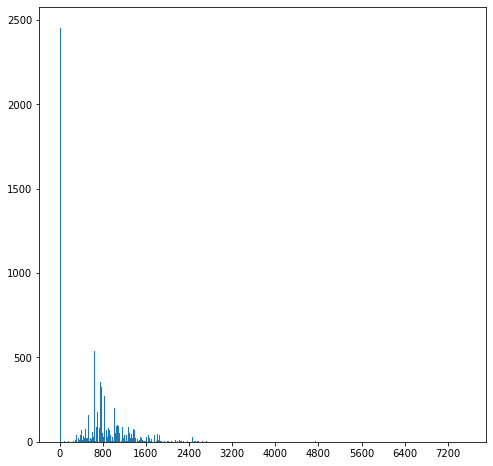

In [65]:
plt.figure(figsize=(8,8))
x_ticks = np.arange(0,12000,800)
plt.xticks(x_ticks)
plt.hist(dff['Levy'],bins=500)

In [66]:
dff['Levy'][dff['Levy']==0]=a

In [67]:
print("Total brands: ",len(dff['Manufacturer'].unique()))
print()
print("Brands: ",dff['Manufacturer'].unique())

Total brands:  62

Brands:  ['VOLKSWAGEN' 'HYUNDAI' 'NISSAN' 'VOLVO' 'OPEL' 'BMW' 'LEXUS'
 'MERCEDES-BENZ' 'DAEWOO' 'TOYOTA' 'FORD' 'HONDA' 'MITSUBISHI' 'SSANGYONG'
 'FIAT' 'KIA' 'CHEVROLET' 'SUBARU' 'LAND ROVER' 'JEEP' 'AUDI' 'DAIHATSU'
 'MAZDA' 'MINI' 'GMC' 'BUICK' 'GAZ' 'VAZ' 'RENAULT' 'DODGE' 'INFINITI'
 'ALFA ROMEO' 'SKODA' 'ACURA' 'SUZUKI' 'LINCOLN' 'TATA' 'CHRYSLER'
 'PEUGEOT' 'SAAB' 'ISUZU' 'ZAZ' 'CITROEN' 'TESLA' 'MASERATI' 'JAGUAR'
 'MERCURY' 'PORSCHE' 'ASTON MARTIN' 'სხვა' 'SATURN' 'CADILLAC' 'FERRARI'
 'SCION' 'UAZ' 'GREATWALL' 'FOTON' 'HUMMER' 'ROVER' 'MG' 'MOSKVICH'
 'BENTLEY']


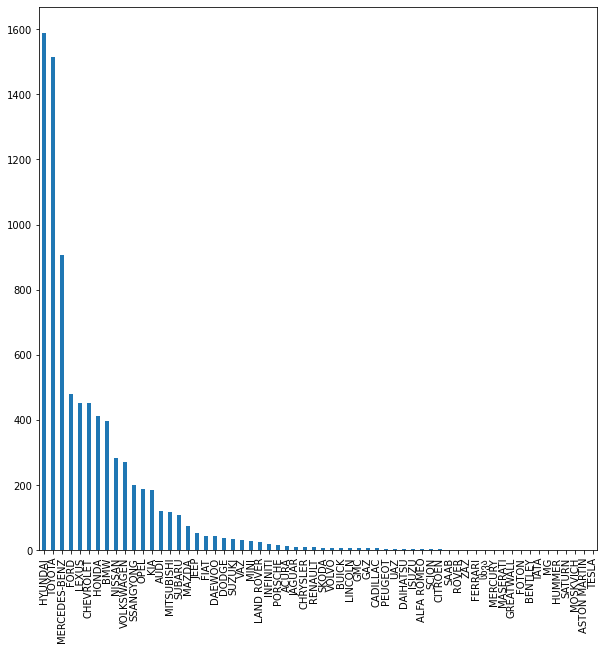

In [68]:
plt.figure(figsize=(10,10))
dff['Manufacturer'].value_counts().plot(kind='bar')

In [69]:
dff['Manufacturer']=ce_manufacturer.transform(dff['Manufacturer'])

In [70]:
print("Total models: ",len(dff['Model'].unique()))
print()
print("Models: ",dff['Model'].unique())

Total models:  995

Models:  ['Golf' 'Sonata' 'Tiida' 'XC90' 'Astra' '320' 'GX 460' 'E 350' 'Lacetti'
 'Camry' 'Prius' 'Sonata hybrid' 'CT 200h' 'E 240' 'E 220' 'Juke'
 'GLA 250 4Matic' 'Mustang' 'Tacoma' 'Camry XLE HYBRID' 'C 220' 'Insight'
 'X5' 'Aqua' 'Santa FE' 'Ist' 'Pajero' 'Elantra' 'Tucson' 'Actyon' 'FIT'
 '500' 'GLE 350' 'Fiesta' 'Optima' 'Volt' 'Versa' 'Sorento' 'Korando'
 'Civic' 'Fusion' 'CHR' 'Genesis' 'X6' 'RX 400' 'H1' 'Sprinter' 'RX 450'
 'Jetta' 'Vectra' 'Sprinter ქირავდება' 'E 300' 'Impreza' '325'
 'Land Rover Sport' 'F150' 'RX 350' 'Gloria' 'Transit' 'Grand Cherokee'
 'Outback' 'Cruze' 'Golf 4' 'Forester' 'Passat' 'Fusion SE HYBRID' 'Focus'
 'Spark' '328' 'Micra' 'ES 300' 'ML 350' 'A7' 'Prius C' 'RAV 4' 'GL 450'
 'Corolla' 'A3' 'Captiva' 'Trax' 'C 250' 'Outlander sport' 'Mira'
 'Viano CD 3.0' 'Highlander' 'Range Rover' 'Camaro' 'GLE 63 AMG' 'Edix'
 'Transit Connect' 'NX 200 200t' 'Demio evropuli' 'LS 460' '335' 'Serena'
 'Viano' 'Prius ჯბლ და ჰედაპი' 'Transit Dublkab

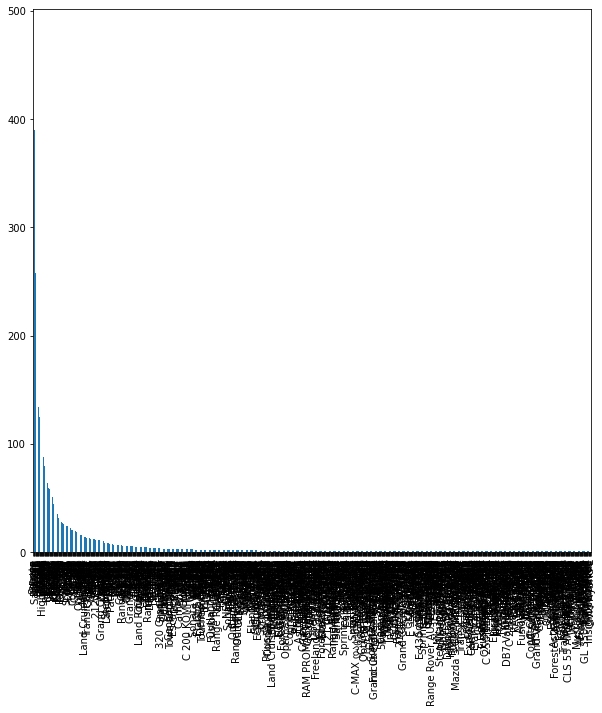

In [71]:
plt.figure(figsize=(10,10))
dff['Model'].value_counts().plot(kind='bar')

In [72]:
dff['Model']=ce_model.transform(dff['Model'])

(array([ 1.,  0.,  0., ...,  0.,  0., 31.]),
 array([1943.    , 1943.0385, 1943.077 , ..., 2019.923 , 2019.9615,
        2020.    ]),
 <a list of 2000 Patch objects>)

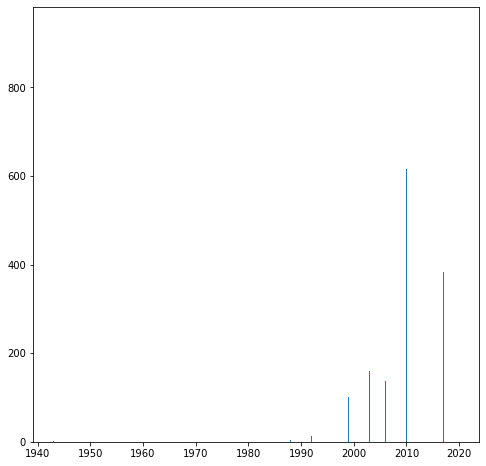

In [73]:
plt.figure(figsize=(8,8))
x_ticks = np.arange(1900,2050,10)
plt.xticks(x_ticks)
plt.hist(dff['Prod. year'],bins=2000)

In [74]:
print("Total categories: ",len(dff['Category'].unique()))
print()
print("Categories: ",dff['Category'].unique())

Total categories:  11

Categories:  ['Hatchback' 'Sedan' 'Jeep' 'Coupe' 'Universal' 'Microbus' 'Pickup'
 'Minivan' 'Cabriolet' 'Goods wagon' 'Limousine']


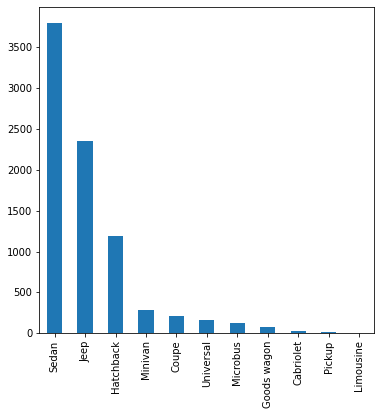

In [75]:
plt.figure(figsize=(6,6))
dff['Category'].value_counts().plot(kind='bar')

In [76]:
dff['Category']=ce_category.transform(dff['Category'])

In [77]:
print(len(dff['Leather interior'].unique()))
print()
print(dff['Leather interior'].unique())

2

['No' 'Yes']


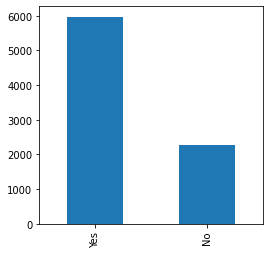

In [78]:
plt.figure(figsize=(4,4))
dff['Leather interior'].value_counts().plot(kind='bar')

In [79]:
dff['Leather interior'][dff['Leather interior']=="Yes"]=1
dff['Leather interior'][dff['Leather interior']=="No"]=0

In [80]:
print("Fuel types: ",len(dff['Fuel type'].unique()))
print()
print("Types: ",dff['Fuel type'].unique())

Fuel types:  7

Types:  ['Diesel' 'Petrol' 'LPG' 'Hybrid' 'CNG' 'Plug-in Hybrid' 'Hydrogen']


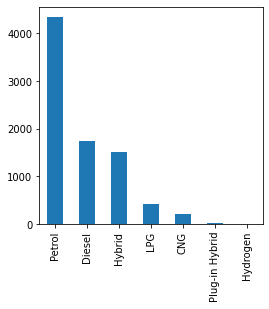

In [81]:
plt.figure(figsize=(4,4))
dff['Fuel type'].value_counts().plot(kind='bar')

In [82]:
f_t=pd.get_dummies(dff['Fuel type'],prefix='f_t')
dff=dff.join(f_t)
del dff['Fuel type']

In [83]:
print("Type of Engine volume: ",len(dff['Engine volume'].unique()))
print()
print("Volume: ",dff['Engine volume'].unique())

Type of Engine volume:  97

Volume:  ['2.0 Turbo' '2.4' '1.5' '3.2' '1.6' '4.6' '3.5' '2' '1.8' '2.5' '1.7'
 '2.2 Turbo' '2.3 Turbo' '4' '1.3' '3' '1.4 Turbo' '2.2' '3.0 Turbo' '3.3'
 '2.9 Turbo' '1.4' '3.2 Turbo' '4.8' '3.6' '2.7' '1.8 Turbo' '1'
 '1.5 Turbo' '2.4 Turbo' '0.7' '5.5' '1.7 Turbo' '4.4' '4.7' '5' '1.2'
 '2.8' '3.8' '1.6 Turbo' '2.6' '5.3' '3.7' '5.7' '6.6' '1.3 Turbo' '2.3'
 '0.2' '4.7 Turbo' '2.5 Turbo' '6.4' '5.6' '1.9 Turbo' '3.4' '5.5 Turbo'
 '6.7' '0.4' '4.4 Turbo' '2.7 Turbo' '4.2' '2.1' '2.1 Turbo' '6.2'
 '0.8 Turbo' '0' '6' '4.3' '1.9' '1.1' '4.6 Turbo' '3.1' '1.2 Turbo' '0.8'
 '3.5 Turbo' '0.6 Turbo' '4.5 Turbo' '6.3' '6.1' '4.8 Turbo' '0.5'
 '4.0 Turbo' '3.6 Turbo' '10.8' '0.7 Turbo' '5.4' '3.7 Turbo' '4.2 Turbo'
 '4.5' '0.6' '2.8 Turbo' '2.9' '0.3 Turbo' '1.0 Turbo' '5.2' '6.0 Turbo'
 '3.9' '2.6 Turbo']


In [84]:
dff['Engine volume_turbo']=1
dff['Engine volume_turbo'][dff['Engine volume'].str[-5:]=="Turbo"]=0

In [85]:
dff['Engine volume']=dff['Engine volume'].str[:3].astype(float)
dff['Engine volume'][dff['Engine volume']==0]=c

(array([5., 0., 0., ..., 0., 0., 1.]),
 array([0.000e+00, 5.000e-03, 1.000e-02, ..., 9.990e+00, 9.995e+00,
        1.000e+01]),
 <a list of 2000 Patch objects>)

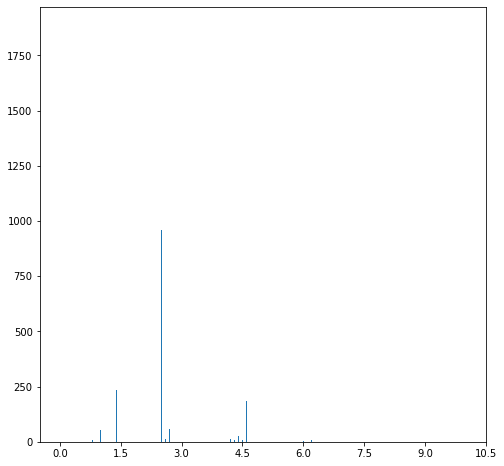

In [86]:
plt.figure(figsize=(8,8))
x_ticks = np.arange(0,25,1.5)
plt.xticks(x_ticks)
plt.hist(dff['Engine volume'],bins=2000)

In [87]:
dff['Mileage']=dff['Mileage'].str[:-2].astype(float)

In [88]:
print("Number of null values: ",sum(dff['Mileage']==0))
dff['Mileage'][dff['Mileage']==0]=b

Number of null values:  292


(array([1.400e+01, 0.000e+00, 0.000e+00, 1.700e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 5.400e+01, 0.000e+00, 0.000e+00, 0.000e+00, 6.115e+03,
        0.000e+00, 0.000e+00, 0.000e+00, 6.800e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 1.473e+03, 0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 4.740e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.600e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

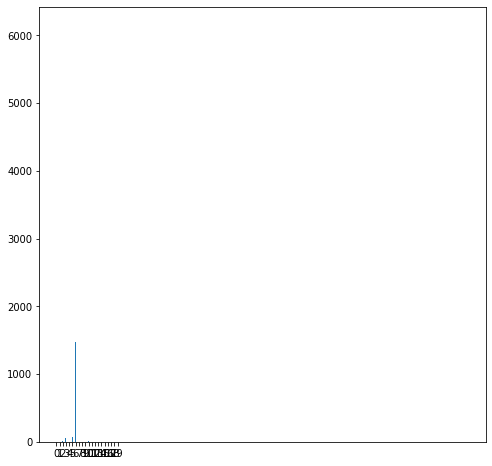

In [89]:
plt.figure(figsize=(8,8))
x_ticks = np.arange(0,20,1)
plt.xticks(x_ticks)
plt.hist(dff['Cylinders'],bins=500)

In [90]:
print("Type of Gear box: ",len(dff['Gear box type'].unique()))
print()
print("Gear box type: ",dff['Gear box type'].unique())

Type of Gear box:  4

Gear box type:  ['Manual' 'Tiptronic' 'Automatic' 'Variator']


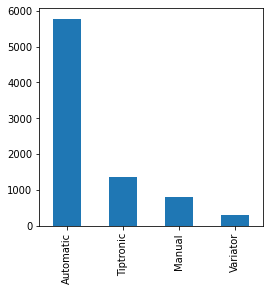

In [91]:
plt.figure(figsize=(4,4))
dff['Gear box type'].value_counts().plot(kind='bar')

In [92]:
dff['Gear box type']=ce_gbt.transform(dff['Gear box type'])

In [93]:
print("Total Drive wheels: ",len(dff['Drive wheels'].unique()))
print()
print("Drive wheels type: ",dff['Drive wheels'].unique())

Total Drive wheels:  3

Drive wheels type:  ['Front' '4x4' 'Rear']


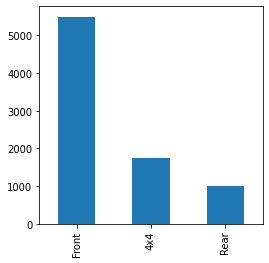

In [94]:
plt.figure(figsize=(4,4))
dff['Drive wheels'].value_counts().plot(kind='bar')

In [95]:
d_w=pd.get_dummies(dff['Drive wheels'],prefix='d_w')
dff=dff.join(d_w)
del dff['Drive wheels']

In [96]:
print("Total Doors type: ",len(dff['Doors'].unique()))
print()
print("Doors type: ",dff['Doors'].unique())

Total Doors type:  3

Doors type:  ['02-Mar' '04-May' '>5']


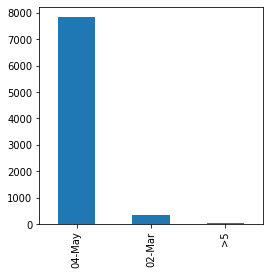

In [97]:
plt.figure(figsize=(4,4))
dff['Doors'].value_counts().plot(kind='bar')

In [98]:
d_=pd.get_dummies(dff['Doors'],prefix='d_')
dff=dff.join(d_)
del dff['Doors']

In [99]:
print("Total wheel drive types: ",len(dff['Wheel'].unique()))
print()
print("Wheel type: ",dff['Wheel'].unique())

Total wheel drive types:  2

Wheel type:  ['Left wheel' 'Right-hand drive']


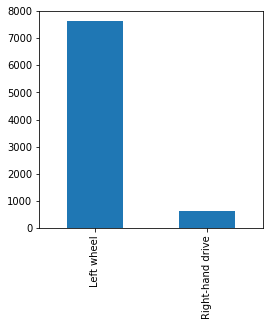

In [100]:
plt.figure(figsize=(4,4))
dff['Wheel'].value_counts().plot(kind='bar')

In [101]:
dff['Wheel'][dff['Wheel']=="Left wheel"]=1
dff['Wheel'][dff['Wheel']=="Right-hand drive"]=0

In [102]:
print("Total Colors: ",len(dff['Color'].unique()))
print()
print("Colors: ",dff['Color'].unique())

Total Colors:  16

Colors:  ['Grey' 'Sky blue' 'Blue' 'Black' 'Silver' 'White' 'Brown' 'Red' 'Golden'
 'Carnelian red' 'Green' 'Orange' 'Beige' 'Yellow' 'Purple' 'Pink']


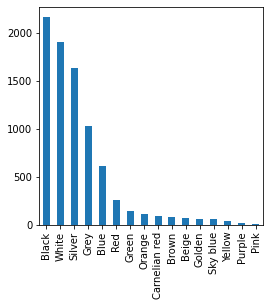

In [103]:
plt.figure(figsize=(4,4))
dff['Color'].value_counts().plot(kind='bar')

In [104]:
dff['Color']=ce_color.transform(dff['Color'])

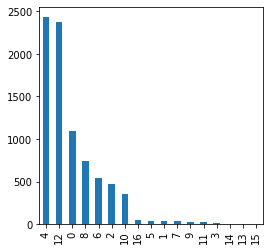

In [105]:
plt.figure(figsize=(4,4))
dff['Airbags'].value_counts().plot(kind='bar')

In [106]:
del dff['Price']

In [107]:
print("New testing set shape: ",dff.shape)
dff.head()

New testing set shape:  (8245, 27)


,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Engine volume,Mileage,Cylinders,Gear box type,Wheel,Color,Airbags,f_t_CNG,f_t_Diesel,f_t_Hybrid,f_t_Hydrogen,f_t_LPG,f_t_Petrol,f_t_Plug-in Hybrid,Engine volume_turbo,d_w_4x4,d_w_Front,d_w_Rear,d__02-Mar,d__04-May,d__>5
0,906.838128,579.0,64.0,2012,2847,0,2.0,1.591900e+06,4,1875,1,2375,10,0,1,0,0,0,0,0,0,0,1,0,1,0,0
1,906.838128,3769.0,1079.0,2012,8736,1,2.4,2.600000e+04,4,3102,1,2375,10,0,0,0,0,0,1,0,1,0,1,0,0,1,0
2,906.838128,660.0,75.0,2005,8736,0,1.5,1.680000e+05,4,13514,0,122,8,0,0,0,0,0,1,0,1,0,1,0,0,1,0
3,975.000000,19.0,4.0,2012,5473,1,3.2,1.430000e+05,6,13514,1,1396,12,0,0,0,0,0,1,0,1,1,0,0,0,1,0
4,906.838128,397.0,150.0,1993,2847,0,1.6,2.000000e+05,4,1875,1,5033,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0


In [108]:
dff=pd.DataFrame(scaler.transform(dff),columns=dff.columns)
dff.head()

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Engine volume,Mileage,Cylinders,Gear box type,Wheel,Color,Airbags,f_t_CNG,f_t_Diesel,f_t_Hybrid,f_t_Hydrogen,f_t_LPG,f_t_Petrol,f_t_Plug-in Hybrid,Engine volume_turbo,d_w_4x4,d_w_Front,d_w_Rear,d__02-Mar,d__04-May,d__>5
0,0.000000,-1.013124,-0.728929,0.191792,-1.084082,-1.625208,-0.350873,4.810385e-18,-0.485866,-1.631843,0.289122,-0.744134,0.791048,-0.162347,1.940709,-0.478011,-0.00721,-0.220508,-1.056873,-0.067012,-2.993693,-0.517052,0.703031,-0.368962,4.874222,-4.500706,-0.081844
1,0.000000,1.222747,1.956747,0.191792,0.942678,0.615306,0.104821,-3.235219e-02,-0.485866,-1.391488,0.289122,-0.744134,0.791048,-0.162347,-0.515276,-0.478011,-0.00721,-0.220508,0.946188,-0.067012,0.334036,-0.517052,0.703031,-0.368962,-0.205161,0.222187,-0.081844
2,0.000000,-0.956351,-0.699823,-1.043097,0.942678,-1.625208,-0.920491,-2.941841e-02,-0.485866,0.648101,-3.458748,-2.179232,0.328091,-0.162347,-0.515276,-0.478011,-0.00721,-0.220508,0.946188,-0.067012,0.334036,-0.517052,0.703031,-0.368962,-0.205161,0.222187,-0.081844
3,0.176712,-1.405628,-0.887688,0.191792,-0.180317,0.615306,1.016210,-2.993492e-02,1.180937,0.648101,0.289122,-1.367730,1.254005,-0.162347,-0.515276,-0.478011,-0.00721,-0.220508,0.946188,-0.067012,0.334036,1.934040,-1.422413,-0.368962,-0.205161,0.222187,-0.081844
4,0.000000,-1.140688,-0.501374,-3.160050,-1.084082,-1.625208,-0.806567,-2.875727e-02,-0.485866,-1.631843,0.289122,0.948938,-1.523737,-0.162347,-0.515276,-0.478011,-0.00721,-0.220508,0.946188,-0.067012,0.334036,-0.517052,0.703031,-0.368962,-0.205161,0.222187,-0.081844


In [109]:
cbr=cb.CatBoostRegressor(iterations=5000,loss_function='MAE',depth=12)
rfr=RandomForestRegressor(n_estimators=4000)
lgbmr=lgbm.LGBMRegressor(max_depth=12,n_estimators=1500,bagging_fraction=0.8)
xgbr=xgb.XGBRegressor(max_depth=8,n_estimators=4000)
gbr=GradientBoostingRegressor(n_estimators=4000,max_depth=12)
etr=ExtraTreesRegressor(n_estimators=4000)

In [ ]:
cbr.fit(df,np.log(y))

Streaming output truncated to the last 5000 lines.
0:	learn: 1.0830073	total: 191ms	remaining: 15m 54s
1:	learn: 1.0649709	total: 297ms	remaining: 12m 21s
2:	learn: 1.0467142	total: 386ms	remaining: 10m 43s
3:	learn: 1.0293234	total: 479ms	remaining: 9m 58s
4:	learn: 1.0123361	total: 571ms	remaining: 9m 29s
5:	learn: 0.9978092	total: 668ms	remaining: 9m 16s
6:	learn: 0.9821599	total: 764ms	remaining: 9m 5s
7:	learn: 0.9667696	total: 853ms	remaining: 8m 52s
8:	learn: 0.9516341	total: 946ms	remaining: 8m 44s
9:	learn: 0.9382738	total: 1.04s	remaining: 8m 40s
10:	learn: 0.9246097	total: 1.16s	remaining: 8m 44s
11:	learn: 0.9114944	total: 1.25s	remaining: 8m 41s
12:	learn: 0.8998812	total: 1.35s	remaining: 8m 38s
13:	learn: 0.8881083	total: 1.44s	remaining: 8m 32s
14:	learn: 0.8757992	total: 1.53s	remaining: 8m 30s
15:	learn: 0.8641734	total: 1.64s	remaining: 8m 31s
16:	learn: 0.8536576	total: 1.75s	remaining: 8m 32s
17:	learn: 0.8429933	total: 1.84s	remaining: 8m 30s
18:	learn: 0.8333862	

In [ ]:
rfr.fit(df,np.log(y))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=4000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred1=np.exp(cbr.predict(dff))
y_pred2=np.exp(rfr.predict(dff))

In [ ]:
lgbmr.fit(df,np.log(y))
y_pred3=np.exp(lgbmr.predict(dff))

In [ ]:
y_p=pd.DataFrame(y_pred1)
y_p[1]=y_pred2
y_p[2]=y_pred3

In [ ]:
y_p.to_csv('y_p.csv')
from google.colab import files
files.download('y_p.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [110]:
y_p=pd.read_csv("/content/drive/MyDrive/MachineHack/Mathco.thon: Car Prediction/y_p.csv")
del y_p['Unnamed: 0']
y_p.head()

,0,1,2
0,16591.139057,12912.600289,20813.844112
1,9572.179770,3901.343075,9688.478236
2,8505.044061,6867.468262,9324.996522
3,3034.048205,2240.828228,2695.727684
4,4524.910296,3956.958753,2897.772154


In [111]:
xgbr.fit(df,np.log(y))
y_pred4=np.exp(xgbr.predict(dff))
y_p[3]=y_pred4

[23:00:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [112]:
gbr.fit(df,np.log(y))
y_pred5=np.exp(gbr.predict(dff))
y_p[4]=y_pred5

In [113]:
etr.fit(df,np.log(y))
y_pred6=np.exp(etr.predict(dff))
y_p[5]=y_pred6

In [114]:
y_p['median']=y_p.median(axis=1)
y_p['max']=y_p.max(axis=1)
y_p['min']=y_p.min(axis=1)
y_p['sum']=(y_p['0']+y_p['1']+y_p['2']+y_p[3]+y_p[4]+y_p[5])
y_p['mean']=y_p['sum']/6

In [118]:
#Final result for submission
y_p.head()

,0,1,2,3,4,5,median,max,min,sum,mean
0,16591.139057,12912.600289,20813.844112,20901.925781,12676.562878,16406.924261,16499.031659,20901.925781,12676.562878,100302.996378,16717.166063
1,9572.179770,3901.343075,9688.478236,9726.241211,1009.762822,5612.286493,7592.233132,9726.241211,1009.762822,39510.291607,6585.048601
2,8505.044061,6867.468262,9324.996522,14649.564453,8762.496352,7471.945675,8633.770207,14649.564453,6867.468262,55581.515326,9263.585888
3,3034.048205,2240.828228,2695.727684,1879.000977,2789.879046,2506.143706,2600.935695,3034.048205,1879.000977,15145.627846,2524.271308
4,4524.910296,3956.958753,2897.772154,4590.173340,4209.844884,4528.847458,4367.377590,4590.173340,2897.772154,24708.506884,4118.084481


In [ ]:
y_p['mean'].to_csv('pred.csv')
from google.colab import files
files.download('pred.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>